In [1]:
import pandas as pd
import numpy as np

from importlib import reload

import plotly
import plotly.graph_objs as go
%matplotlib inline

In [2]:
import gameplan.helpers as hp
# import gameplan.income_streams
# import gameplan.expenses
# import gameplan.user
# import gameplan.cashflows
# import gameplan.assets

# reload(gameplan.helpers)
# reload(gameplan.income_streams)
# reload(gameplan.expenses)
# reload(gameplan.user)
# reload(gameplan.cashflows)
# reload(gameplan.assets)
from gameplan.income_streams import IncomeStream, Salary
from gameplan.user import User
# from gameplan.cashflows import CashFlow
# from gameplan.assets import Contribution, CashSavings

import gameplan

In [3]:
usr = User('example@gmail.com')
usr.user_id

'1022232228'

In [4]:
# 'A', 'BA', 'Q', 'BQ', 'M', 'BM', 'CBM', 'SM', '6M', '6BM', '6CMB'

In [5]:
s = Salary(120000/24, payday_freq='M', next_paycheck_dt=hp.get_offset_date('M', pd.datetime(2019,7,4)))

Annual salary is $60,000


,salary
2020-03-31,5000.0
2020-04-30,5000.0
2020-05-31,5000.0
2020-06-30,5000.0
2020-07-31,5000.0


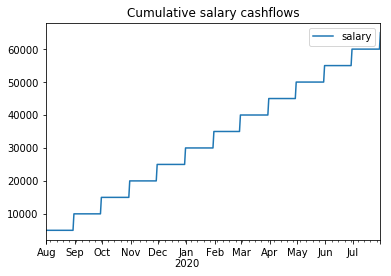

In [6]:
print(f"Annual salary is ${s.annualized_salary:,.0f}")
s.plot_cash_flows(cumulative=True, title='Cumulative salary cashflows')
s.cash_flows_df.tail()

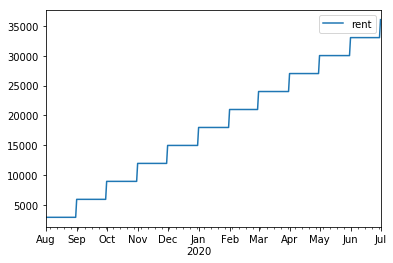

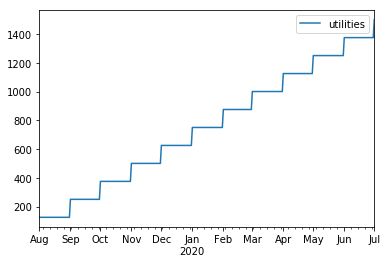

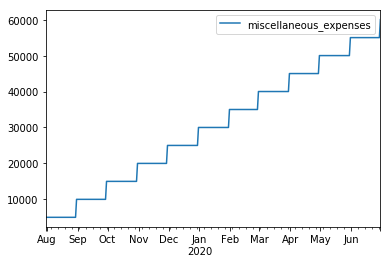

In [7]:
r = gameplan.expenses.Rent(3000)
u = gameplan.expenses.Utilities(125)
misc = gameplan.expenses.Expense(
    expense_type='miscellaneous_expenses', 
    amount=5000, 
    recurring=True, 
    start_dt=pd.datetime.today(),
    freq='M'
)

expenses = [r, u, misc]
for exp in expenses: 
    exp.plot_cash_flows()

In [8]:
usr.add_income_stream(s)
for exp in expenses:
    usr.add_expense(exp)

In [9]:
usr.all_cashflows.agg_cash_flows('Q')

,salary,rent,utilities,miscellaneous_expenses,total_net_cash_flow
2019-09-30,15000.0,-6000.0,-250.0,-15000.0,-6250.0
2019-12-31,15000.0,-9000.0,-375.0,-15000.0,-9375.0
2020-03-31,15000.0,-9000.0,-375.0,-15000.0,-9375.0
2020-06-30,15000.0,-9000.0,-375.0,-15000.0,-9375.0
2020-09-30,5000.0,-3000.0,-125.0,0.0,1875.0


In [10]:
usr.all_cashflows.total.head()

2019-07-31       0.0
2019-08-01   -3125.0
2019-08-31       0.0
2019-09-01   -3125.0
2019-09-30       0.0
Name: total_net_cash_flow, dtype: float64

In [11]:
usr.all_cashflows.agg_cash_flows('D').head()

,salary,rent,utilities,miscellaneous_expenses,total_net_cash_flow
2019-07-31,5000.0,0.0,0.0,-5000.0,0.0
2019-08-01,0.0,-3000.0,-125.0,0.0,-3125.0
2019-08-02,0.0,0.0,0.0,0.0,0.0
2019-08-03,0.0,0.0,0.0,0.0,0.0
2019-08-04,0.0,0.0,0.0,0.0,0.0


In [12]:
usr.expenses.total.tail()

2020-05-01   -3125.0
2020-05-31   -5000.0
2020-06-01   -3125.0
2020-06-30   -5000.0
2020-07-01   -3125.0
Name: total_net_expense, dtype: float64

In [13]:
usr.income_streams.total.tail()

2020-03-31    5000.0
2020-04-30    5000.0
2020-05-31    5000.0
2020-06-30    5000.0
2020-07-31    5000.0
Freq: M, Name: total_net_income_stream, dtype: float64

In [14]:
usr.all_cashflows.as_df.head()

,salary,rent,utilities,miscellaneous_expenses,total_net_cash_flow
2019-07-31,5000.0,0.0,0.0,-5000.0,0.0
2019-08-01,0.0,-3000.0,-125.0,0.0,-3125.0
2019-08-31,5000.0,0.0,0.0,-5000.0,0.0
2019-09-01,0.0,-3000.0,-125.0,0.0,-3125.0
2019-09-30,5000.0,0.0,0.0,-5000.0,0.0


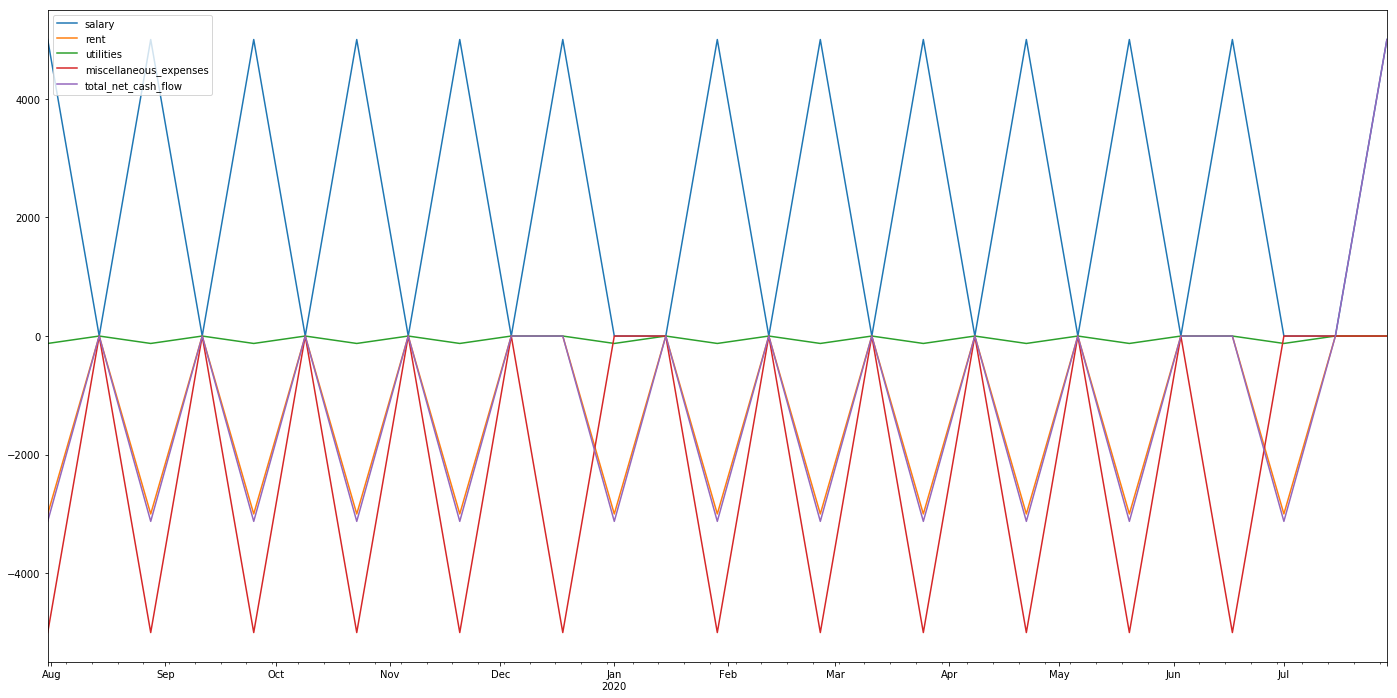

In [15]:
usr.all_cashflows.agg_cash_flows('14D').plot(figsize=(24,12))

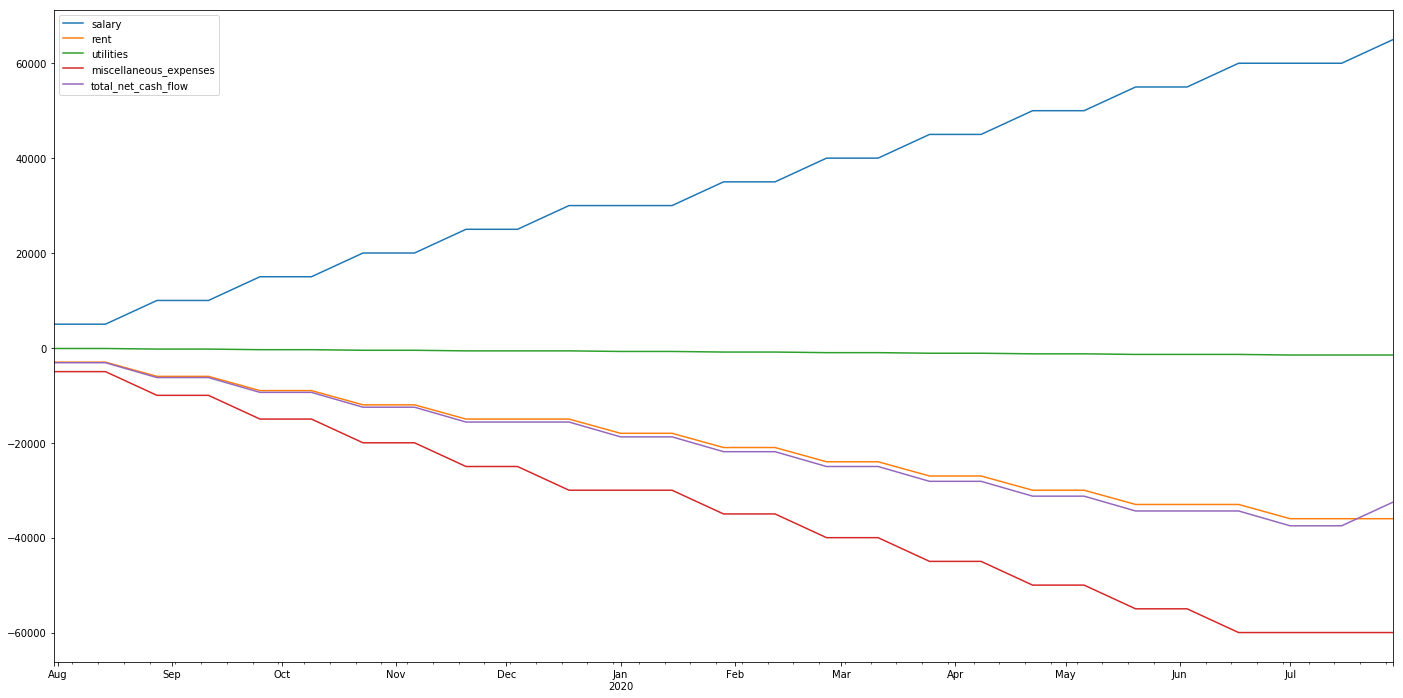

In [16]:
usr.all_cashflows.agg_cash_flows('14D').cumsum().plot(figsize=(24,12))

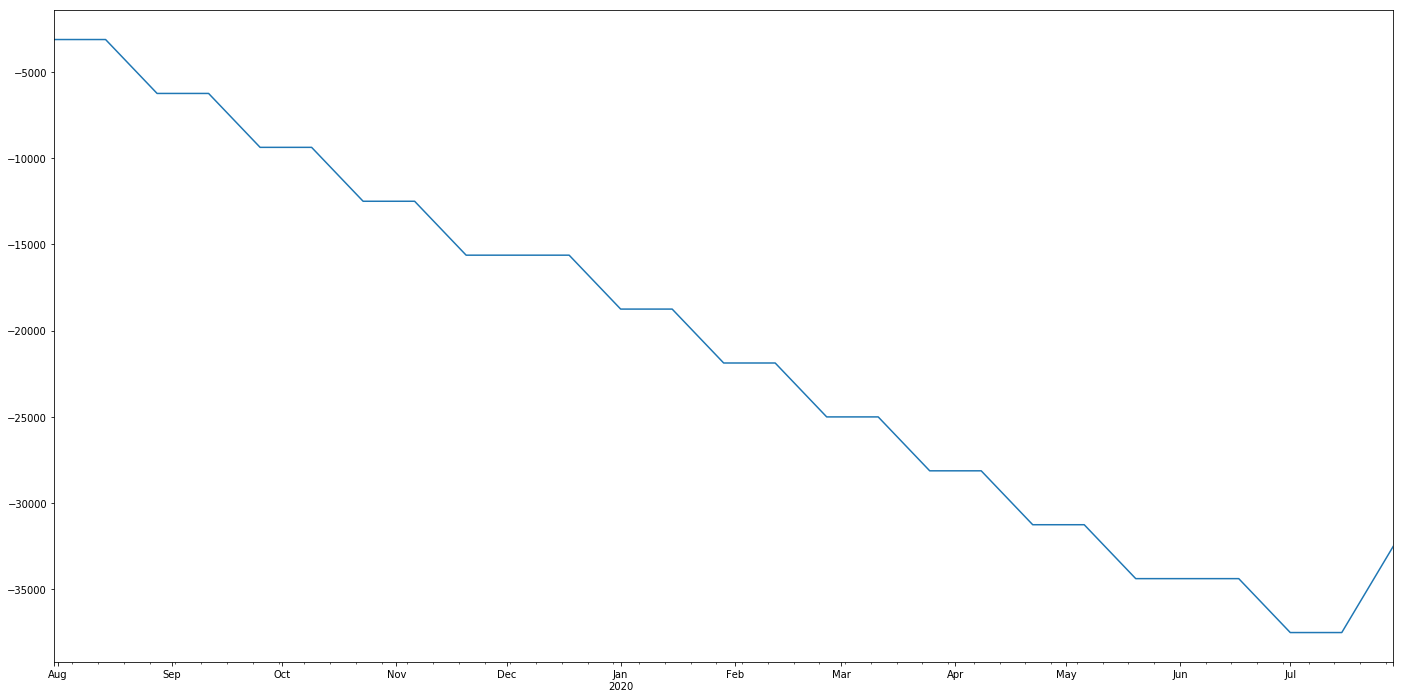

In [17]:
usr.all_cashflows.agg_cash_flows('14D').cumsum()['total_net_cash_flow'].plot(figsize=(24,12))

In [18]:
gameplan.contributions.Contribution.from_income_stream(s, pct=.05)

In [19]:
from gameplan.contributions import Contribution
from gameplan.assets import CashSavings

In [20]:
c = Contribution.from_income_stream(s, pct=0.05, label='salary_5%')

In [30]:
cs = CashSavings(initial_balance=12000, annualized_interest_rate=0.024)

In [31]:
cs.contributions.add_object(c, label='salary_5')

In [32]:
cs.contributions.as_df

,initial_balance,salary_5%,total_net_contribution
2019-07-06,12000.0,0.0,12000.0
2019-07-31,0.0,250.0,250.0
2019-08-31,0.0,250.0,250.0
2019-09-30,0.0,250.0,250.0
2019-10-31,0.0,250.0,250.0
2019-11-30,0.0,250.0,250.0
2019-12-31,0.0,250.0,250.0
2020-01-31,0.0,250.0,250.0
2020-02-29,0.0,250.0,250.0
2020-03-31,0.0,250.0,250.0


In [33]:
cs.value_through_time

0     12000.000000
1     12269.728726
2     12544.747156
3     12819.500411
4     13095.639847
5     13371.480121
6     13648.745063
7     13926.575360
8     14203.138364
9     14482.099089
10    14760.675120
11    15040.772683
12    15320.451087
13    15601.690053
dtype: float64

In [25]:
self = cs

In [34]:
t = self.contributions.total
date_diffs = t.index.to_series().diff()
compound_factors = date_diffs.apply(
    lambda x: np.e**(self.annualized_interest_rate * x.days / 365.25)
    )

totals = []
total = 0
for x, r in zip(t.values, compound_factors.values):
    r = r if pd.notnull(r) else 0
    total = x + r * total
    totals.append(total)

# return pd.Series(totals)

In [36]:
pd.Series(data=totals, index=t.index, name='total_value')

2019-07-06    12000.0
2019-07-31    12250.0
2019-08-31    12500.0
2019-09-30    12750.0
2019-10-31    13000.0
2019-11-30    13250.0
2019-12-31    13500.0
2020-01-31    13750.0
2020-02-29    14000.0
2020-03-31    14250.0
2020-04-30    14500.0
2020-05-31    14750.0
2020-06-30    15000.0
2020-07-31    15250.0
Name: total_value, dtype: float64

In [29]:
compound_factors

2019-07-06    NaN
2019-07-31    1.0
2019-08-31    1.0
2019-09-30    1.0
2019-10-31    1.0
2019-11-30    1.0
2019-12-31    1.0
2020-01-31    1.0
2020-02-29    1.0
2020-03-31    1.0
2020-04-30    1.0
2020-05-31    1.0
2020-06-30    1.0
2020-07-31    1.0
dtype: float64

In [140]:
t = cs.contributions.total

In [119]:
xs = test.total_net_contribution.values
ar = 0.065
rs = test.index.to_series().diff().apply(lambda x: np.e**(ar * x.days / 365.25))

totals = []
total = 0
for x, r in zip(xs, rs):
    r = r if pd.notnull(r) else 0
    total = x + r * total
    totals.append(total)

pd.Series(totals)
    

0      250.000000
1      501.383004
2      754.066950
3     1008.238459
4     1263.635646
5     1520.626097
6     1779.038223
7     2038.243303
8     2299.518895
9     2561.828417
10    2826.000490
11    3091.128313
12    3358.228480
dtype: float64

In [83]:
for x, r in zip([5, 4, 10, 19], [None, 1.004, 1.007, 1.002]):
    print(x*(r or 0))

0
4.016
10.069999999999999
19.038


In [ ]:
for (x, r)

In [ ]:
x + r * total

In [68]:
a = test.index.to_series().diff().apply(lambda x: np.e**(ar * x.days / 365.25))

In [91]:
total = 0
for x, r in zip([5, 4, 10, 19], [None, 1.004, 1.007, 1.002]):
    
    print(total)

5
9.02
19.08314
38.12130628


In [86]:
5*1.004 + 4

9.02

In [73]:
a

2019-07-31         NaN
2019-08-31    1.004253
2019-09-30    1.004115
2019-10-31    1.004253
2019-11-30    1.004115
2019-12-31    1.004253
2020-01-31    1.004253
2020-02-29    1.003978
2020-03-31    1.004253
2020-04-30    1.004115
2020-05-31    1.004253
2020-06-30    1.004115
2020-07-31    1.004253
Freq: M, dtype: float64

In [74]:
a.cumprod()

2019-07-31         NaN
2019-08-31    1.004253
2019-09-30    1.008385
2019-10-31    1.012674
2019-11-30    1.016841
2019-12-31    1.021165
2020-01-31    1.025508
2020-02-29    1.029587
2020-03-31    1.033966
2020-04-30    1.038221
2020-05-31    1.042636
2020-06-30    1.046927
2020-07-31    1.051379
Freq: M, dtype: float64

In [72]:
test['compound_factor'].cumsum()

,salary_5%,total_net_contribution
2019-07-31,250.0,250.0
2019-08-31,500.0,500.0
2019-09-30,750.0,750.0
2019-10-31,1000.0,1000.0
2019-11-30,1250.0,1250.0
2019-12-31,1500.0,1500.0
2020-01-31,1750.0,1750.0
2020-02-29,2000.0,2000.0
2020-03-31,2250.0,2250.0
2020-04-30,2500.0,2500.0


In [70]:
a.cumprod()

2019-07-31         NaN
2019-08-31    1.004253
2019-09-30    1.008385
2019-10-31    1.012674
2019-11-30    1.016841
2019-12-31    1.021165
2020-01-31    1.025508
2020-02-29    1.029587
2020-03-31    1.033966
2020-04-30    1.038221
2020-05-31    1.042636
2020-06-30    1.046927
2020-07-31    1.051379
Freq: M, dtype: float64

In [67]:
np.e**(ar * 0.08487337440109514)

1.0042526858328586

In [60]:
a.days / 365.25

0.08487337440109514

In [38]:
test

,salary_5%,total_net_contribution
2019-07-31,250.0,250.0
2019-08-31,250.0,250.0
2019-09-30,250.0,250.0
2019-10-31,250.0,250.0
2019-11-30,250.0,250.0
2019-12-31,250.0,250.0
2020-01-31,250.0,250.0
2020-02-29,250.0,250.0
2020-03-31,250.0,250.0
2020-04-30,250.0,250.0


In [ ]:
agameplan.collections.Contributions.add_object(c)

In [ ]:
gameplan.assets.Asset

## Testing/Scratchwork

In [25]:
hp.get_offset_date('MS')

Timestamp('2019-07-01 15:28:31.628919')

In [26]:
# Fixed payments - Lets assume you want to pay XX per month
# Minimum payments - Lets assume you make minimum payments
# Goal-based - Lets assume you want to pay back w/in XX years


In [27]:
iss = InterestRateSeries(.063, name='6.3% Fixed Rate', freq='M')

NameError: name 'InterestRateSeries' is not defined

In [88]:
# sd = StudentDebt(30000, 0.055)

In [ ]:
# TO DO:
1. (Maybe) Allow CashFlow to be instantiated w/ an existing CashFlow? A Series w/ variable $ amount?
2. CashFlows should be able to grow (change) through time rather than being fixed
# 3. Instantiate CashFlow from a series

In [3]:

{} is empty

NameError: name 'empty' is not defined

In [18]:
from gameplan.assets import CashSavings

In [19]:
cash = CashSavings(initial_balance=20000)

In [23]:
from gameplan.contributions import Contribution

In [27]:
cash.contributions.add_object(Contribution.from_income_stream(s, pct=.12, label='salary_savings_2'))

In [ ]:
# All Net Positive cashflows go to cash savings

In [36]:
def add_2(x): return x + 2

In [37]:
class Test():
    def __init__(self, val=0):
        self.val = val
        setattr(self, 'plus_2', add_2(self.val))

In [38]:
tst = Test(val=2)

In [41]:
tst.val = 5

In [44]:
getattr(None, 'blah', 'k')

'k'

In [ ]:
setattr()

In [35]:
usr.cash_flows_df

,salary,total_income,rent,utilities,miscellaneous_expenses,total_expenses
2019-06-30,0.0,0.0,-0.0,-0.0,-5000.0,-5000.0
2019-07-01,0.0,0.0,-3000.0,-125.0,-0.0,-3125.0
2019-07-15,5000.0,5000.0,0.0,0.0,0.0,0.0
2019-07-31,5000.0,5000.0,-0.0,-0.0,-5000.0,-5000.0
2019-08-01,0.0,0.0,-3000.0,-125.0,-0.0,-3125.0
2019-08-15,5000.0,5000.0,0.0,0.0,0.0,0.0
2019-08-31,5000.0,5000.0,-0.0,-0.0,-5000.0,-5000.0
2019-09-01,0.0,0.0,-3000.0,-125.0,-0.0,-3125.0
2019-09-15,5000.0,5000.0,0.0,0.0,0.0,0.0
2019-09-30,5000.0,5000.0,-0.0,-0.0,-5000.0,-5000.0


In [33]:
Contribution.from_cashflow(usr.net_cash_flow, cashflow_type='net_cashflow')

AttributeError: 'Series' object has no attribute 'date_range'

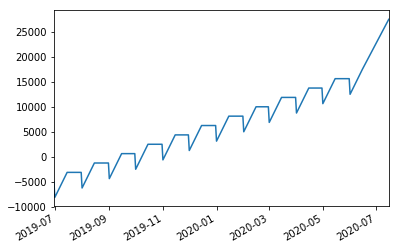

In [31]:
usr.net_cash_flow.cumsum().plot()

In [29]:
cash.contributions.contributions_df

,salary_savings,salary_savings_2,total_contributions
2019-07-15,750.0,600.0,1350.0
2019-07-31,750.0,600.0,1350.0
2019-08-15,750.0,600.0,1350.0
2019-08-31,750.0,600.0,1350.0
2019-09-15,750.0,600.0,1350.0
2019-09-30,750.0,600.0,1350.0
2019-10-15,750.0,600.0,1350.0
2019-10-31,750.0,600.0,1350.0
2019-11-15,750.0,600.0,1350.0
2019-11-30,750.0,600.0,1350.0


In [66]:
!pip install cashflows

  Running setup.py install for cashflows ... done
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [67]:
import cashflows

In [69]:
cashflows.Loan??

In [70]:
cashflows.loan.fixed_rate_loan(12000, .045, 30, pd.datetime.today())

/Users/davidbrodsky/.pyenv/versions/3.7.3/envs/db_env/lib/python3.7/site-packages/cashflows/loan.py:40: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,Beg_Ppal_Amount,Nom_Rate,Tot_Payment,Int_Payment,Ppal_Payment,End_Ppal_Amount
2019,12000.000000,0.045,0.000000,0.000000,0.000000,1.200000e+04
2020,12000.000000,0.045,402.796067,5.400000,397.396067,1.160260e+04
2021,11602.603933,0.045,402.796067,5.221172,397.574895,1.120503e+04
2022,11205.029038,0.045,402.796067,5.042263,397.753804,1.080728e+04
2023,10807.275234,0.045,402.796067,4.863274,397.932793,1.040934e+04
2024,10409.342441,0.045,402.796067,4.684204,398.111863,1.001123e+04
2025,10011.230578,0.045,402.796067,4.505054,398.291013,9.612940e+03
2026,9612.939565,0.045,402.796067,4.325823,398.470244,9.214469e+03
2027,9214.469321,0.045,402.796067,4.146511,398.649556,8.815820e+03
2028,8815.819766,0.045,402.796067,3.967119,398.828948,8.416991e+03


In [ ]:
Portfolio = [
Consumption,
Debt servicing costs
IncomeStreams = active (salary) + passive (asset-based),


Assets,
Liabilities 
]

In [93]:
# from gameplan.expenses import Expense
from gameplan.assets import Asset, CashSavings
from gameplan.liabilities import Liability
from gameplan.collections import Expenses, IncomeStreams, Collection, CashFlowCollection
from gameplan.cashflows import CashFlow

In [131]:
class Portfolio():
    def __init__(self):
        self.assets = Collection(collection_type=Asset, objects=dict(
            initial_savings=CashSavings(initial_balance=0, annualized_interest_rate=0.0)
        ))
        self.liablities = Collection(collection_type=Liability, objects={})
        self.income_streams = IncomeStreams(income_streams={}) # includes salary, etc.
        self.consumption = Expenses(expenses={}) #+ ...

    
    def add_income_stream(self, income_stream, label=None, if_exists='error'):
        self.income_streams.add_object(income_stream, label, if_exists)


    def add_expense(self, expense, label=None, if_exists='error'):
        self.consumption.add_object(expense, label, if_exists)


    def add_asset(self, asset, label=None, if_exists='error'):
        self.assets.add_object(asset, label, if_exists)
        
    def add_liability(self, liability, label=None, if_exists='error'):
        self.liabilities.add_object(liability, label, if_exists)
        
        
    @property
    def income_streams_from_assets(self):
        return {}

    @property
    def debt_service_from_liabilities(self):
        return {}

    def transfer_value(from_x, to_y, amt=None, pct=None):
        pass
    
    @property
    def portfolio_cashflows(self):
        return CashFlowCollection(
            collection_type=CashFlow,
            objects=[
                self.income_streams_from_assets, 
                self.debt_service_from_liabilities,
                self.income_streams.contents,
                self.consumption.contents 
            ]
        )
        
    
    @property
    def portfolio_pv(self): # aka net_worth?
        pass
    
    
    def simulate_portfolio_value(self):
        pass
    
    def plot_portfolio_value(self):
        pass
    
    #TO DO: Each of these functions should probs be defined at the IncomeStream/Asset/Liability/Expense level as well?
    #TO DO: Add functionality to add objects to each of the collections (i.e. add asset/liability//etc.)

In [175]:
scdf = s.cash_flows_df

In [190]:
cs = CashSavings(initial_balance=40)

In [193]:
cs.contributions.add_object()

In [ ]:
Con

In [217]:
t_from = s
t_to = CashSavings(initial_balance=40)
pct = .05
date_range = s.date_range
label='from_sal'

In [ ]:
# input_dict = {a}

In [ ]:
print(t_from.cash_flows_df.head())
print(t_to.contributions.head())

In [234]:
transfer_values = [pct * x for x in t_from.values]
c = Contribution(label, date_range, values=transfer_values)
t_from.values = (pd.Series(t_from.values) - pd.Series(transfer_values)).values
t_to.contributions.add_object(c, label=label)

In [238]:
def income_stream_to_cash(income_stream, cash_account, contrib_pct, date_range, label=None):
    transfer_values = [contrib_pct * x for x in income_stream.values]
    c = Contribution(label, date_range, values=transfer_values)
    income_stream.values = (pd.Series(income_stream.values) - pd.Series(transfer_values)).values
    cash_account.contributions.add_object(c, label=label)
    
    

In [240]:
print(s.cash_flows_df.head())
print(t_to.contributions.as_df.head())

            salary
2019-07-31  4500.0
2019-08-31  4500.0
2019-09-30  4500.0
2019-10-31  4500.0
2019-11-30  4500.0


AttributeError: 'NoneType' object has no attribute 'head'

In [242]:
s1, cs1 = income_stream_to_cash(s, t_to, 0.075, s.date_range, label='test')

In [ ]:
def compound_interest(principal, rate, times_per_year, years):
    # (1 + r/n)
    body = 1 + (rate / times_per_year)
    # nt
    exponent = times_per_year * years
    # P(1 + r/n)^nt
    return principal * pow(body, exponent)

In [253]:
!pip install pyql

    100% |████████████████████████████████| 51kB 4.7MB/s ta 0:00:011
    100% |████████████████████████████████| 256kB 4.8MB/s ta 0:00:01
    100% |████████████████████████████████| 184kB 7.0MB/s ta 0:00:01
  Running setup.py install for promise ... done
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [254]:
import pyql

In [ ]:
from pyql.schema.

In [251]:
t_to.contributions.total.cumsum() + 200

2019-07-31     537.5
2019-08-31     875.0
2019-09-30    1212.5
2019-10-31    1550.0
2019-11-30    1887.5
2019-12-31    2225.0
2020-01-31    2562.5
2020-02-29    2900.0
2020-03-31    3237.5
2020-04-30    3575.0
2020-05-31    3912.5
2020-06-30    4250.0
2020-07-31    4587.5
Freq: M, Name: total_net_contribution, dtype: float64

In [244]:
print(s.cash_flows_df.head())
print(t_to.contributions.total.head())

            salary
2019-07-31  4162.5
2019-08-31  4162.5
2019-09-30  4162.5
2019-10-31  4162.5
2019-11-30  4162.5
2019-07-31    337.5
2019-08-31    337.5
2019-09-30    337.5
2019-10-31    337.5
2019-11-30    337.5
Freq: M, Name: total_net_contribution, dtype: float64


In [241]:
t_to.contributions.as_df

In [232]:
t_from.values = (pd.Series(t_from.values) - pd.Series(transfer_values)).values

In [233]:
t_from.cash_flows_df

,salary
2019-07-31,4500.0
2019-08-31,4500.0
2019-09-30,4500.0
2019-10-31,4500.0
2019-11-30,4500.0
2019-12-31,4500.0
2020-01-31,4500.0
2020-02-29,4500.0
2020-03-31,4500.0
2020-04-30,4500.0


In [231]:
t_from_new = t_from.values 

In [224]:
(pd.Series(t_from.values) - pd.Series(transfer_values))

0     4750.0
1     4750.0
2     4750.0
3     4750.0
4     4750.0
5     4750.0
6     4750.0
7     4750.0
8     4750.0
9     4750.0
10    4750.0
11    4750.0
12    4750.0
dtype: float64

In [220]:
transfer

2019-07-31    250.0
2019-08-31    250.0
2019-09-30    250.0
2019-10-31    250.0
2019-11-30    250.0
2019-12-31    250.0
2020-01-31    250.0
2020-02-29    250.0
2020-03-31    250.0
2020-04-30    250.0
2020-05-31    250.0
2020-06-30    250.0
2020-07-31    250.0
Freq: M, Name: from_sal, dtype: float64

In [215]:
c = Contribution(contribution_label='from_sal', date_range=date_range, values=)


In [216]:
c.cash_flows_df

,from_sal
2019-07-31,250.0
2019-08-31,250.0
2019-09-30,250.0
2019-10-31,250.0
2019-11-30,250.0
2019-12-31,250.0
2020-01-31,250.0
2020-02-29,250.0
2020-03-31,250.0
2020-04-30,250.0


In [201]:
c.plot_cash_flows()

DataError: No numeric types to aggregate

In [174]:
cf.timeseries.cashflow(const_value=s.cash_flows_df.values.tolist(), start=s.start_dt, end=s.end_dt, freq=s.freq)

ValueError: Of the three parameters: start, end, and periods, exactly two must be specified

In [168]:
i_r = cf.interest_rate(0.01, start=s.start_dt, end=s.end_dt, freq=s.freq)
cf.analysis.timevalue(s.cash_flows_df.to, prate=i_r)

ValueError: Argument must be a list:             salary
2019-07-31     NaN
2019-08-31     NaN
2019-09-30     NaN
2019-10-31     NaN
2019-11-30     NaN
2019-12-31     NaN
2020-01-31     NaN
2020-02-29     NaN
2020-03-31     NaN
2020-04-30     NaN
2020-05-31     NaN
2020-06-30     NaN
2020-07-31     NaN

In [132]:
a = Portfolio()
a.add_asset(CashSavings(initial_balance=1320), label='first_contribution', if_exists='overwrite')
a.add_income_stream(s, label='salary', if_exists='overwrite')
for e in expenses:
    a.add_expense(e, e.name, if_exists='overwrite')

In [129]:
cfc = CashFlowCollection(objects=[
                a.income_streams_from_assets, 
                a.debt_service_from_liabilities,
                a.income_streams.contents,
                a.consumption.contents 
            ])